# Question No 1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [2]:
df=pd.read_csv('50_Startups.csv')
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

# Corelation Matrix

In [5]:
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


# Scatterplot between variables along with histograms

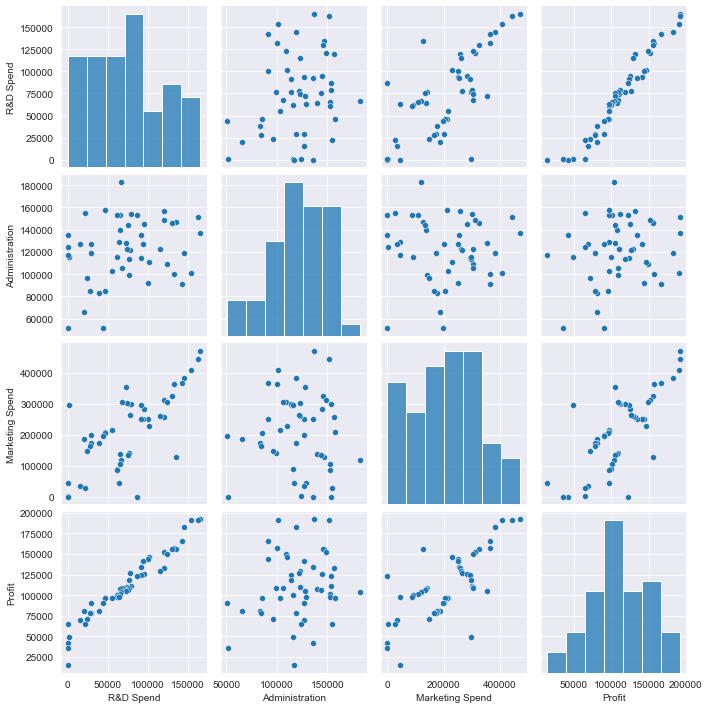

In [6]:
sns.set_style(style='darkgrid')
sns.pairplot(df)

In [7]:
df.rename(columns={'R&D Spend': 'RnD','Marketing Spend':'Marketing','New York':'NewYork'},inplace=True)

# Preparing a Model

In [8]:
import statsmodels.formula.api as smf 
model = smf.ols('Profit~RnD+Administration+Marketing+State',data=df).fit()

In [9]:
model.params

Intercept            50125.343832
State[T.Florida]       198.788793
State[T.New York]      -41.887019
RnD                      0.806023
Administration          -0.027004
Marketing                0.026980
dtype: float64

In [10]:
print(model.tvalues, '\n', model.pvalues)

Intercept             7.280560
State[T.Florida]      0.058970
State[T.New York]    -0.012864
RnD                  17.368580
Administration       -0.517012
Marketing             1.573889
dtype: float64 
 Intercept            4.444178e-09
State[T.Florida]     9.532429e-01
State[T.New York]    9.897941e-01
RnD                  2.578772e-21
Administration       6.077373e-01
Marketing            1.226769e-01
dtype: float64


In [11]:
(model.rsquared,model.rsquared_adj)

(0.9507524843355148, 0.945156175737278)

# Simple Linear Regression Models

In [12]:
ml_v=smf.ols('Profit~RnD',data = df).fit()  
#t and p-Values
print(ml_v.tvalues, '\n', ml_v.pvalues)  

Intercept    19.320288
RnD          29.151139
dtype: float64 
 Intercept    2.782697e-24
RnD          3.500322e-32
dtype: float64


In [13]:
ml_v=smf.ols('Profit~Marketing',data = df).fit()  
#t and p-Values
print(ml_v.tvalues, '\n', ml_v.pvalues) 

Intercept    7.808356
Marketing    7.802657
dtype: float64 
 Intercept    4.294735e-10
Marketing    4.381073e-10
dtype: float64


In [14]:
ml_v=smf.ols('Profit~Administration',data = df).fit()  
#t and p-Values
print(ml_v.tvalues, '\n', ml_v.pvalues) 

Intercept         3.040044
Administration    1.419493
dtype: float64 
 Intercept         0.003824
Administration    0.162217
dtype: float64


In [15]:
ml_v=smf.ols('Profit~State',data = df).fit()  
#t and p-Values
print(ml_v.tvalues, '\n', ml_v.pvalues) 

Intercept            10.536302
State[T.Florida]      1.049860
State[T.New York]     0.706364
dtype: float64 
 Intercept            5.774813e-14
State[T.Florida]     2.991510e-01
State[T.New York]    4.834492e-01
dtype: float64


In [16]:
ml_v=smf.ols('Profit~Administration+Marketing+RnD',data = df).fit()  
#t and p-Values
print(ml_v.tvalues, '\n', ml_v.pvalues) 

Intercept          7.626218
Administration    -0.525507
Marketing          1.655077
RnD               17.846374
dtype: float64 
 Intercept         1.057379e-09
Administration    6.017551e-01
Marketing         1.047168e-01
RnD               2.634968e-22
dtype: float64


In [17]:
ml_v=smf.ols('Profit~Administration+Marketing',data = df).fit()  
#t and p-Values
print(ml_v.tvalues, '\n', ml_v.pvalues) 

Intercept         1.142741
Administration    2.467779
Marketing         8.281039
dtype: float64 
 Intercept         2.589341e-01
Administration    1.729198e-02
Marketing         9.727245e-11
dtype: float64


# Calculating VIF

In [18]:
df['State'].replace({'New York': '1', 'California': '2', 'Florida': '3'},inplace= True)
df.head()

,RnD,Administration,Marketing,State,Profit
0,165349.20,136897.80,471784.10,1,192261.83
1,162597.70,151377.59,443898.53,2,191792.06
2,153441.51,101145.55,407934.54,3,191050.39
3,144372.41,118671.85,383199.62,1,182901.99
4,142107.34,91391.77,366168.42,3,166187.94


In [19]:
rsq_hp = smf.ols('RnD~Administration+Marketing+State',data=df).fit().rsquared  
vif_hp = 1/(1-rsq_hp) # 16.33

rsq_wt = smf.ols('Administration~RnD+Marketing+State',data=df).fit().rsquared  
vif_wt = 1/(1-rsq_wt) # 564.98

rsq_vol = smf.ols('Marketing~RnD+Administration+State',data=df).fit().rsquared  
vif_vol = 1/(1-rsq_vol) #  564.84

rsq_sp = smf.ols('State~RnD+Administration+Marketing',data=df).fit().rsquared  
vif_sp = 1/(1-rsq_sp) #  16.35

# Storing vif values in a data frame
d1 = {'Variables':['RnD','Administration','Marketing,State'],'VIF':[vif_hp,vif_wt,vif_vol,vif_sp]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

ValueError: endog has evaluated to an array with multiple columns that has shape (50, 3). This occurs when the variable converted to endog is non-numeric (e.g., bool or str).

# Residual Analysis

## Test for Normality of Residuals (Q-Q Plot)

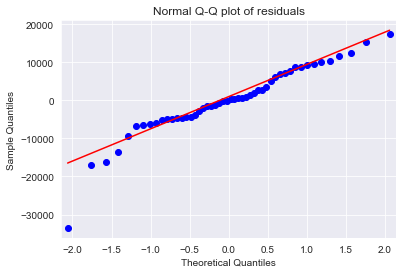

In [20]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [21]:
list(np.where(model.resid>1200))

[array([ 1,  2,  3, 10, 11, 12, 13, 16, 19, 20, 25, 28, 34, 35, 36, 38, 40,
        41, 43, 45], dtype=int64)]

# Residual Plot for Homoscedasticity

In [22]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

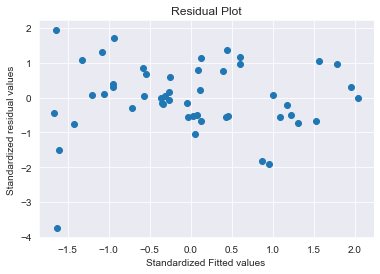

In [23]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

# #Residual Vs Regressors

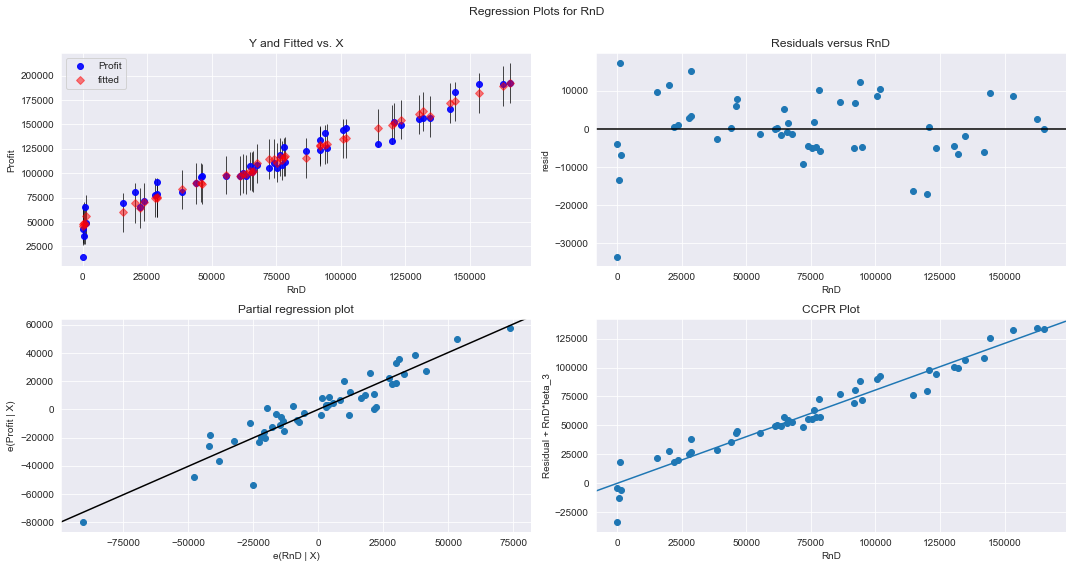

In [24]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "RnD", fig=fig)
plt.show()

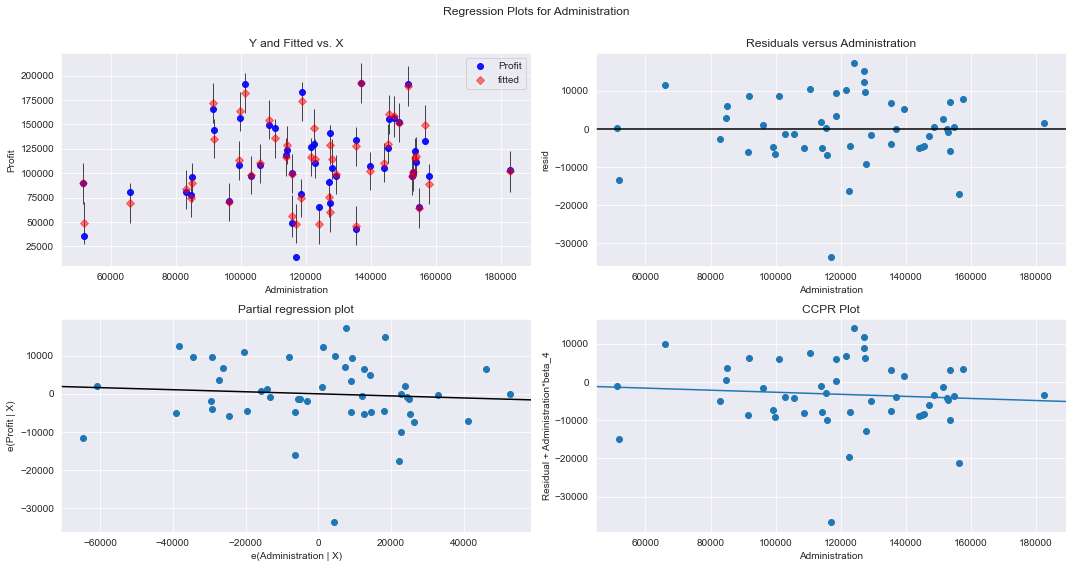

In [25]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Administration", fig=fig)
plt.show()

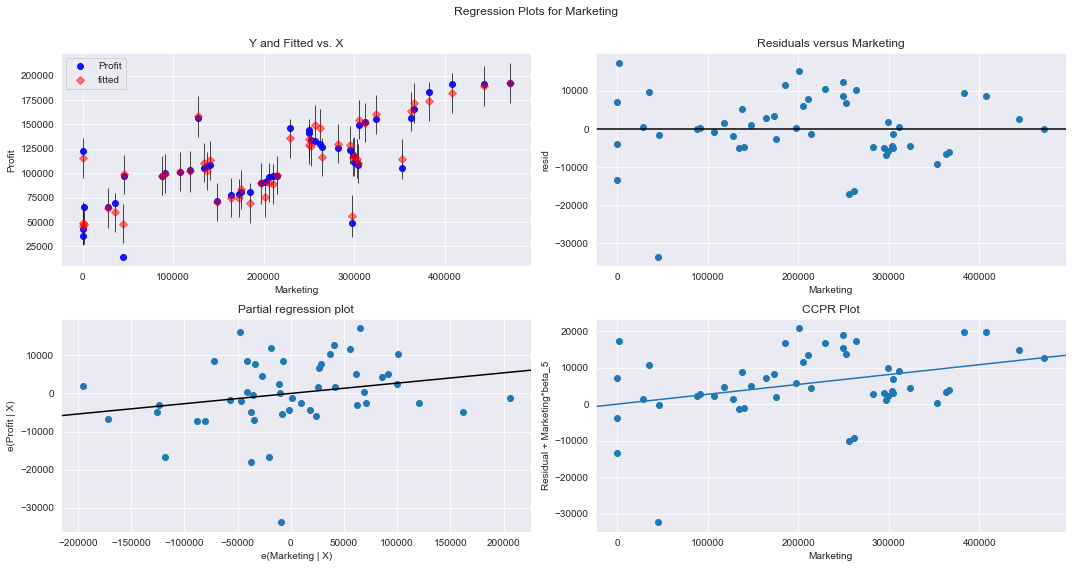

In [26]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Marketing", fig=fig)
plt.show()

# Model Deletion Diagnostics

## Detecting Influencers/Outliers

### Cook’s Distance

In [75]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

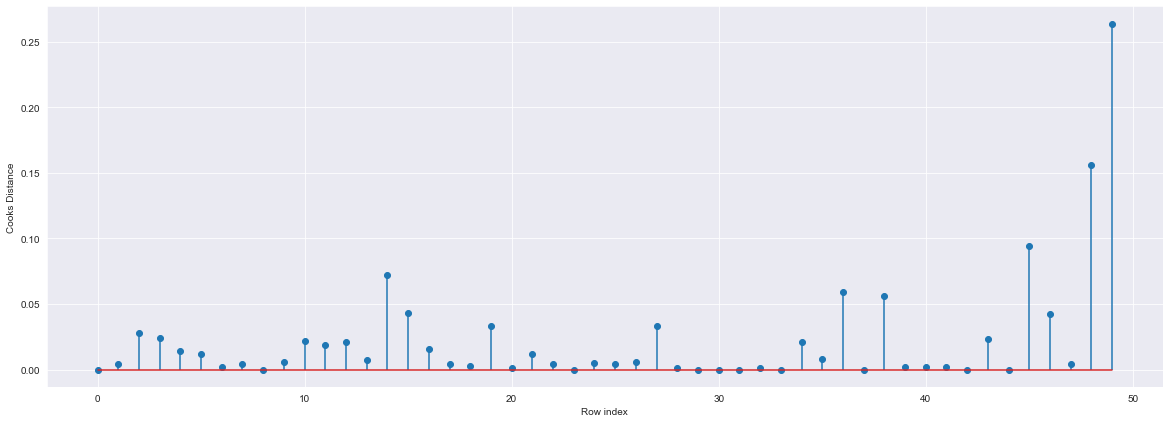

In [28]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [29]:
(np.argmax(c),np.max(c))

(49, 0.2639594358721132)

## High Influence points

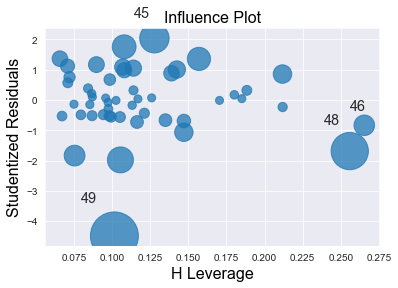

In [30]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [3]:
k = df.shape[1]
n = df.shape[0]
leverage_cutoff = 3*((k + 1)/n)

### From the above plot , it is evident that data point 48 and 49 are the influencers

In [32]:
df[df.index.isin([48,49])]

,RnD,Administration,Marketing,State,Profit
48,542.05,51743.15,0.00,1,35673.41
49,0.00,116983.80,45173.06,2,14681.40


In [33]:
df.head()

,RnD,Administration,Marketing,State,Profit
0,165349.20,136897.80,471784.10,1,192261.83
1,162597.70,151377.59,443898.53,2,191792.06
2,153441.51,101145.55,407934.54,3,191050.39
3,144372.41,118671.85,383199.62,1,182901.99
4,142107.34,91391.77,366168.42,3,166187.94


# Improving the Model

In [34]:
df_new=pd.read_csv('50_Startups.csv')
df_new.rename(columns={'R&D Spend': 'RnD','Marketing Spend':'Marketing','New York':'NewYork'},inplace=True)

In [35]:
df1=df_new.drop(df_new.index[[48,49]],axis=0).reset_index()
df1.rename(columns={'R&D Spend': 'RnD','Marketing Spend':'Marketing','New York':'NewYork'},inplace=True)

In [36]:
df1.drop(['index'],axis=1)
df1

,index,RnD,Administration,Marketing,State,Profit
0,0,165349.20,136897.80,471784.10,New York,192261.83
1,1,162597.70,151377.59,443898.53,California,191792.06
2,2,153441.51,101145.55,407934.54,Florida,191050.39
3,3,144372.41,118671.85,383199.62,New York,182901.99
4,4,142107.34,91391.77,366168.42,Florida,166187.94
5,5,131876.90,99814.71,362861.36,New York,156991.12
6,6,134615.46,147198.87,127716.82,California,156122.51
7,7,130298.13,145530.06,323876.68,Florida,155752.60
8,8,120542.52,148718.95,311613.29,New York,152211.77
9,9,123334.88,108679.17,304981.62,California,149759.96


# Build Model

In [37]:
final_ml_V=smf.ols('Profit~RnD+Administration+Marketing',data=df1).fit()

In [38]:
(final_ml_V.rsquared,final_ml_V.aic)

(0.9626766170294073, 994.6690439260116)

#### Comparing above R-Square and AIC values, model 'final_ml_V' has high R- square and low AIC value hence include variable 'VOL' so that multi collinearity problem would be resolved

# Cook's Distance

In [39]:
model_influence_V = final_ml_V.get_influence()
(c_V, _) = model_influence_V.cooks_distance

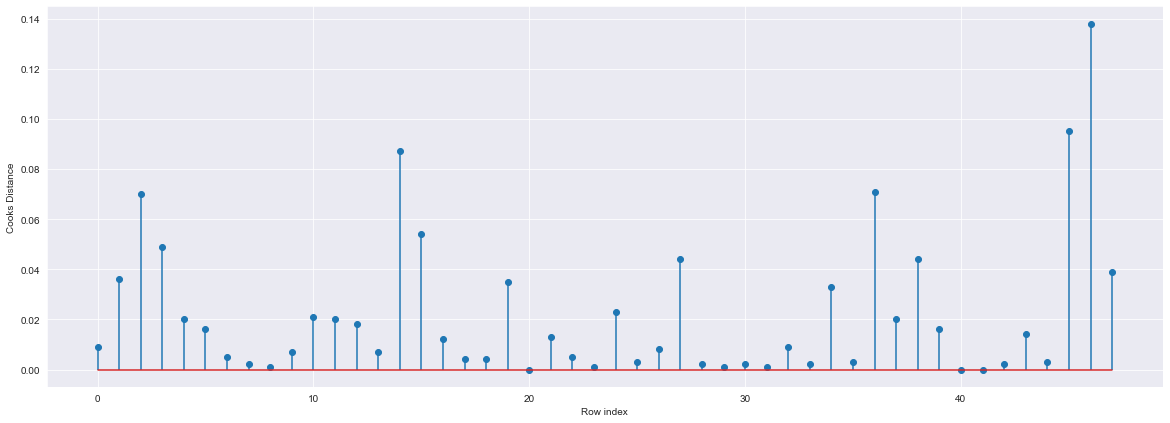

In [40]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(df1)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [41]:
(np.argmax(c_V),np.max(c_V))

(46, 0.13829133994334533)

In [42]:
df1[df1.index.isin([45,46])]

,index,RnD,Administration,Marketing,State,Profit
45,45,1000.23,124153.04,1903.93,New York,64926.08
46,46,1315.46,115816.21,297114.46,Florida,49490.75


In [43]:
df2=df1.drop(df1.index[[45,46]],axis=0)
df2

,index,RnD,Administration,Marketing,State,Profit
0,0,165349.20,136897.80,471784.10,New York,192261.83
1,1,162597.70,151377.59,443898.53,California,191792.06
2,2,153441.51,101145.55,407934.54,Florida,191050.39
3,3,144372.41,118671.85,383199.62,New York,182901.99
4,4,142107.34,91391.77,366168.42,Florida,166187.94
5,5,131876.90,99814.71,362861.36,New York,156991.12
6,6,134615.46,147198.87,127716.82,California,156122.51
7,7,130298.13,145530.06,323876.68,Florida,155752.60
8,8,120542.52,148718.95,311613.29,New York,152211.77
9,9,123334.88,108679.17,304981.62,California,149759.96


In [44]:
df3=df2.reset_index()

In [45]:
df4=df3.drop(['index'],axis=1)

In [46]:
df4

,level_0,RnD,Administration,Marketing,State,Profit
0,0,165349.20,136897.80,471784.10,New York,192261.83
1,1,162597.70,151377.59,443898.53,California,191792.06
2,2,153441.51,101145.55,407934.54,Florida,191050.39
3,3,144372.41,118671.85,383199.62,New York,182901.99
4,4,142107.34,91391.77,366168.42,Florida,166187.94
5,5,131876.90,99814.71,362861.36,New York,156991.12
6,6,134615.46,147198.87,127716.82,California,156122.51
7,7,130298.13,145530.06,323876.68,Florida,155752.60
8,8,120542.52,148718.95,311613.29,New York,152211.77
9,9,123334.88,108679.17,304981.62,California,149759.96


In [47]:
final_ml_V=smf.ols('Profit~RnD+Administration+Marketing',data=df4).fit()

In [48]:
model_influence_V = final_ml_V.get_influence()
(c_V, _) = model_influence_V.cooks_distance

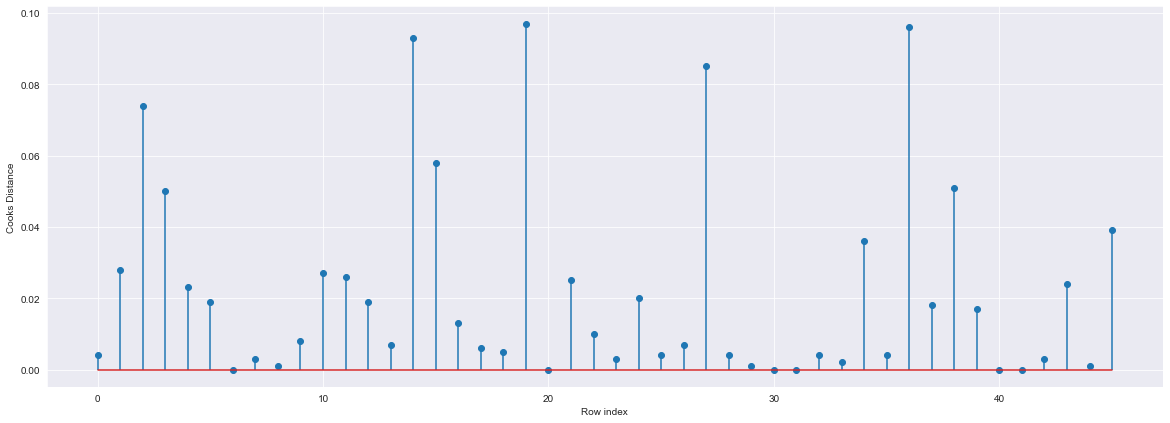

In [49]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(df4)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [50]:
(np.argmax(c_V),np.max(c_V))

(19, 0.09705035449314824)

In [51]:
final_ml_V=smf.ols('Profit~RnD+Administration+Marketing',data=df4).fit()

In [52]:
(final_ml_V.rsquared,final_ml_V.aic)

(0.962593650298269, 950.0635928720131)

In [53]:
df5=df4.drop(df1.index[[3,14,15,4,19,27,36,38]],axis=0)
df5 

,level_0,RnD,Administration,Marketing,State,Profit
0,0,165349.20,136897.80,471784.10,New York,192261.83
1,1,162597.70,151377.59,443898.53,California,191792.06
2,2,153441.51,101145.55,407934.54,Florida,191050.39
5,5,131876.90,99814.71,362861.36,New York,156991.12
6,6,134615.46,147198.87,127716.82,California,156122.51
7,7,130298.13,145530.06,323876.68,Florida,155752.60
8,8,120542.52,148718.95,311613.29,New York,152211.77
9,9,123334.88,108679.17,304981.62,California,149759.96
10,10,101913.08,110594.11,229160.95,Florida,146121.95
11,11,100671.96,91790.61,249744.55,California,144259.40


In [54]:
df6=df5.reset_index()

In [55]:
df7=df6.drop(['index'],axis=1)

In [56]:
df7

,level_0,RnD,Administration,Marketing,State,Profit
0,0,165349.20,136897.80,471784.10,New York,192261.83
1,1,162597.70,151377.59,443898.53,California,191792.06
2,2,153441.51,101145.55,407934.54,Florida,191050.39
3,5,131876.90,99814.71,362861.36,New York,156991.12
4,6,134615.46,147198.87,127716.82,California,156122.51
5,7,130298.13,145530.06,323876.68,Florida,155752.60
6,8,120542.52,148718.95,311613.29,New York,152211.77
7,9,123334.88,108679.17,304981.62,California,149759.96
8,10,101913.08,110594.11,229160.95,Florida,146121.95
9,11,100671.96,91790.61,249744.55,California,144259.40


In [57]:
final_ml_V=smf.ols('Profit~RnD+Administration+Marketing',data=df7).fit()

In [58]:
model_influence_V = final_ml_V.get_influence()
(c_Vv, _) = model_influence_V.cooks_distance

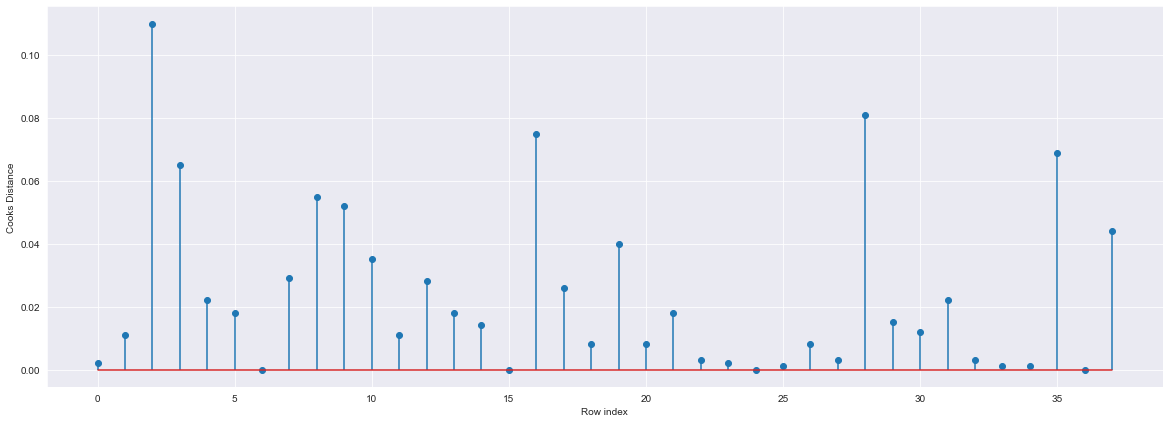

In [59]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(df7)),np.round(c_Vv,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [60]:
final_ml_V=smf.ols('Profit~RnD+Administration+Marketing',data=df7).fit()

In [61]:
(final_ml_V.rsquared,final_ml_V.aic)

(0.978113813753286, 766.3003518444262)

In [62]:
df8=df7.drop(df1.index[[2,3,8,9,16,28,35]],axis=0)
df8 

,level_0,RnD,Administration,Marketing,State,Profit
0,0,165349.20,136897.80,471784.10,New York,192261.83
1,1,162597.70,151377.59,443898.53,California,191792.06
4,6,134615.46,147198.87,127716.82,California,156122.51
5,7,130298.13,145530.06,323876.68,Florida,155752.60
6,8,120542.52,148718.95,311613.29,New York,152211.77
7,9,123334.88,108679.17,304981.62,California,149759.96
10,12,93863.75,127320.38,249839.44,Florida,141585.52
11,13,91992.39,135495.07,252664.93,California,134307.35
12,16,78013.11,121597.55,264346.06,California,126992.93
13,17,94657.16,145077.58,282574.31,New York,125370.37


In [63]:
df9=df8.reset_index()

In [64]:
df10=df9.drop(['index'],axis=1)
df10

,level_0,RnD,Administration,Marketing,State,Profit
0,0,165349.20,136897.80,471784.10,New York,192261.83
1,1,162597.70,151377.59,443898.53,California,191792.06
2,6,134615.46,147198.87,127716.82,California,156122.51
3,7,130298.13,145530.06,323876.68,Florida,155752.60
4,8,120542.52,148718.95,311613.29,New York,152211.77
5,9,123334.88,108679.17,304981.62,California,149759.96
6,12,93863.75,127320.38,249839.44,Florida,141585.52
7,13,91992.39,135495.07,252664.93,California,134307.35
8,16,78013.11,121597.55,264346.06,California,126992.93
9,17,94657.16,145077.58,282574.31,New York,125370.37


In [65]:
final_ml_V=smf.ols('Profit~RnD+Administration+Marketing',data=df10).fit()

In [66]:
model_influence_V = final_ml_V.get_influence()
(c_Vvv, _) = model_influence_V.cooks_distance

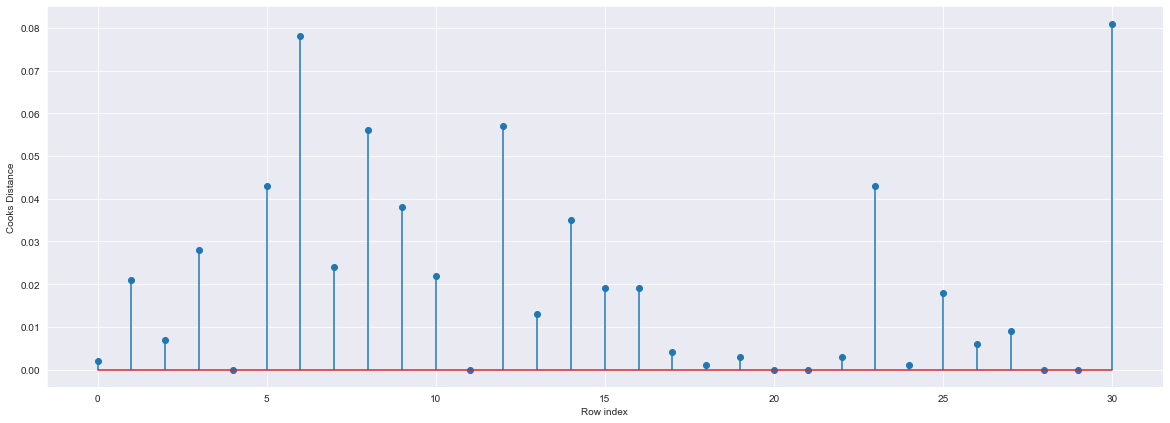

In [67]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(df10)),np.round(c_Vvv,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [68]:
final_ml_V=smf.ols('Profit~RnD+Administration+Marketing',data=df10).fit()

In [69]:
(final_ml_V.rsquared,final_ml_V.aic)

(0.9841326740529734, 614.0366423897573)

# Predicting New value

In [70]:
new_data=pd.DataFrame({'RnD':165349.20,"Administration":136897.80,"Marketing":471784.10,"State":'NewYork'},index=[1])

In [71]:
final_ml_V.predict(new_data)

1    192965.612532
dtype: float64

In [72]:
final_ml_V.predict(df_new.iloc[0:5,])

0    192965.612532
1    189638.435026
2    181471.391292
3    173421.830266
4    171159.276781
dtype: float64

In [73]:
pred_y = final_ml_V.predict(df_new)

In [4]:
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [74]:
pred_y

0     192965.612532
1     189638.435026
2     181471.391292
3     173421.830266
4     171159.276781
5     163148.661425
6     155382.763042
7     160079.137282
8     152098.369390
9     154204.382508
10    134719.206809
11    134720.930420
12    129303.974873
13    127938.579696
14    149349.010864
15    145621.342429
16    117804.716698
17    131137.500605
18    129601.262911
19    113277.903605
20    117903.052884
21    119340.927295
22    116310.973045
23    111529.269628
24    112156.628468
25    102339.574590
26    110309.910215
27    116867.897180
28    102334.920773
29    101722.991009
30     98533.270812
31     97535.956857
32     97699.170842
33     98666.178097
34     91246.023753
35     91151.574759
36     77449.308236
37     89521.373018
38     70718.467829
39     84218.257333
40     76415.827981
41     75620.842844
42     71628.843811
43     60638.709624
44     65284.520962
45     48193.002400
46     60506.794636
47     47282.747508
48     48199.342832
49     49233.083010
